In [1]:
from __future__ import print_function, division
from sympy import *
import ast
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
#from brokenaxes import brokenaxes

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
name = "free_energy_def.dat"
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)

In [4]:
name = "assign_symbols_final.dat"
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)

In [5]:
w_array = np.loadtxt("w_array.dat")

In [6]:
name = "ML_parameter.dat" #load n_conv, con_dim,kill (killsmall)
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)
kill=float(kill)
print(n_parameter,conv_dim,n_conv,kill)

1 513 4 0.05


In [7]:
fed_eqn

<function __main__.fed_eqn>

In [8]:
#fed_eqn()

In [9]:
name = "all_parameter.dat"
tmp = open(name, "r")
tmp=tmp.read()
#print(tmp)
tmp=tmp.replace("/varible:0",":")
tmp=tmp.replace("/const_1:0",":")

for i in range(100):
    tmp=tmp.replace("_"+str(i),"")
tmp=tmp.replace("[[","")
tmp=tmp.replace("]]","")
tmp=tmp.replace("\n",",")
tmp=tmp.replace(":","\":")
tmp=tmp.replace(",",",\"")
tmp="{\""+tmp+"}"
tmp=tmp.replace(",\"}","}")
#print(tmp)
dict_all=ast.literal_eval(tmp)

In [10]:
dict_all.keys()

dict_keys(['a1L0', 'a1L1', 'a1L10', 'a1L11', 'a1L12', 'a1L13', 'a1L14', 'a1L15', 'a1L16', 'a1L17', 'a1L18', 'a1L19', 'a1L2', 'a1L20', 'a1L21', 'a1L22', 'a1L23', 'a1L24', 'a1L25', 'a1L26', 'a1L27', 'a1L28', 'a1L29', 'a1L3', 'a1L30', 'a1L31', 'a1L32', 'a1L33', 'a1L34', 'a1L35', 'a1L4', 'a1L5', 'a1L6', 'a1L7', 'a1L8', 'a1L9', 'a2L10', 'a2L15', 'a2L16', 'a2L18', 'a2L19', 'a2L20', 'a2L21', 'a2L22', 'a2L23', 'a2L24', 'a2L25', 'a2L26', 'a2L27', 'a2L28', 'a2L29', 'a2L3', 'a2L30', 'a2L31', 'a2L32', 'a2L33', 'a2L34', 'a2L35', 'a2L36', 'a2L37', 'a2L38', 'a2L39', 'a2L4', 'a2L40', 'a2L41', 'a2L45', 'a2L46', 'a2L48', 'a2L49', 'a2L50', 'a2L51', 'a2L52', 'a2L53', 'a2L9', 'a2L11', 'a2L17', 'a2L42', 'a2L43', 'a2L44', 'a2L47', 'a2L5'])

In [11]:
kill_small=0
for i in list(dict_all.keys()):
    if(np.abs(dict_all[i])<kill and i[0]=="a"):
        dict_all[i]=0
        kill_small+=1
print(len(dict_all.keys()),kill_small)

81 26


In [12]:
input_symbols = fed_eqn().subs(dict_all).free_symbols

In [13]:
input_str = "["
for i in range(n_parameter):
    input_str+="seps"+str(i)+","
for i in range(n_conv):
    input_str+="sn"+str(i)+","
input_str += "]"
tmp = "input_str="+input_str
exec(tmp)

In [14]:
input_str

[eps0, n0, n1, n2, n3]

In [15]:
fd = lambdify(input_str,fed_eqn().subs(dict_all))

In [16]:
fd

<function numpy.<lambda>>

In [17]:
fed_eqn()

a2L3*(a1L12*n0 + a1L13*n1 + a1L14*n2 + a1L15*eps0*n3)*(a1L16*n0 + a1L17*n1 + a1L18*n2 + a1L19*eps0*n3) + a2L4*(a1L20*n0 + a1L21*n1 + a1L22*n2 + a1L23*eps0*n3)*(a1L24*n0 + a1L25*n1 + a1L26*n2 + a1L27*eps0*n3) + a2L5*(a1L28*n0 + a1L29*n1 + a1L30*n2 + a1L31*eps0*n3)/(a1L32*n0 + a1L33*n1 + a1L34*n2 + a1L35*eps0*n3 + 1) + (a2L18*(a1L0*n0 + a1L1*n1 + a1L2*n2 + a1L3*eps0*n3) + a2L19*(exp(a1L4*n0 + a1L5*n1 + a1L6*n2 + a1L7*eps0*n3) - 1) + a2L20*log(a1L10*n2 + a1L11*eps0*n3 + a1L8*n0 + a1L9*n1 + 1) + a2L21*(a1L12*n0 + a1L13*n1 + a1L14*n2 + a1L15*eps0*n3)*(a1L16*n0 + a1L17*n1 + a1L18*n2 + a1L19*eps0*n3) + a2L22*(a1L20*n0 + a1L21*n1 + a1L22*n2 + a1L23*eps0*n3)*(a1L24*n0 + a1L25*n1 + a1L26*n2 + a1L27*eps0*n3) + a2L23*(a1L28*n0 + a1L29*n1 + a1L30*n2 + a1L31*eps0*n3)/(a1L32*n0 + a1L33*n1 + a1L34*n2 + a1L35*eps0*n3 + 1))*(a2L24*(a1L0*n0 + a1L1*n1 + a1L2*n2 + a1L3*eps0*n3) + a2L25*(exp(a1L4*n0 + a1L5*n1 + a1L6*n2 + a1L7*eps0*n3) - 1) + a2L26*log(a1L10*n2 + a1L11*eps0*n3 + a1L8*n0 + a1L9*n1 + 1) + a2L2

In [18]:
fed_eqn().subs(dict_all)

-0.5505477*(0.15196347*n0 - 0.39830536*n1 + 0.11997815*n2)*(0.4507714*eps0*n3 - 0.27385*n0 - 0.38018966*n1 + 0.3314684*n2)*(-0.48827153890566*eps0*n3 - 0.102425521623679*n0 - 0.0960028092023862*n1 - 0.525453200074944*n2 + 0.24892256*(0.15196347*n0 - 0.39830536*n1 + 0.11997815*n2)*(0.4507714*eps0*n3 - 0.27385*n0 - 0.38018966*n1 + 0.3314684*n2) - 0.2448266*(0.0632784*eps0*n3 + 0.15260038*n0 - 0.29205367*n1 - 0.39168647*n2)*(0.12526949*eps0*n3 + 0.2187326*n0 + 0.15640846*n1 - 0.26057413*n2) - 0.38916522*(-0.97701424*eps0*n3 - 0.5044318*n0 - 0.08790455*n1 - 1.0639597*n2)/(-0.3635221*eps0*n3 - 1.1627965*n1 + 1)) - 0.09906254*(0.15196347*n0 - 0.39830536*n1 + 0.11997815*n2)*(0.4507714*eps0*n3 - 0.27385*n0 - 0.38018966*n1 + 0.3314684*n2) - 0.20664054*(0.0632784*eps0*n3 + 0.15260038*n0 - 0.29205367*n1 - 0.39168647*n2)*(0.12526949*eps0*n3 + 0.2187326*n0 + 0.15640846*n1 - 0.26057413*n2) - 0.050811*(0.0632784*eps0*n3 + 0.15260038*n0 - 0.29205367*n1 - 0.39168647*n2)*(0.12526949*eps0*n3 + 0.2187326*

In [19]:
dict_all

{'a1L0': 0.19529162,
 'a1L1': 0.18304563,
 'a1L10': 0.09582391,
 'a1L11': -0.31787732,
 'a1L12': 0.15260038,
 'a1L13': -0.29205367,
 'a1L14': -0.39168647,
 'a1L15': 0.0632784,
 'a1L16': 0.2187326,
 'a1L17': 0.15640846,
 'a1L18': -0.26057413,
 'a1L19': 0.12526949,
 'a1L2': 1.0018656,
 'a1L20': 0.15196347,
 'a1L21': -0.39830536,
 'a1L22': 0.11997815,
 'a1L23': 0,
 'a1L24': -0.27385,
 'a1L25': -0.38018966,
 'a1L26': 0.3314684,
 'a1L27': 0.4507714,
 'a1L28': -0.5044318,
 'a1L29': -0.08790455,
 'a1L3': 0.93097246,
 'a1L30': -1.0639597,
 'a1L31': -0.97701424,
 'a1L32': 0,
 'a1L33': -1.1627965,
 'a1L34': 0,
 'a1L35': -0.3635221,
 'a1L4': 0.44950384,
 'a1L5': 0,
 'a1L6': 0,
 'a1L7': -0.2018587,
 'a1L8': 0,
 'a1L9': 0,
 'a2L10': -0.35030738,
 'a2L11': 0,
 'a2L15': -0.22600088,
 'a2L16': 0,
 'a2L17': 0,
 'a2L18': -0.3567244,
 'a2L19': 0.23668459,
 'a2L20': 0,
 'a2L21': -0.2522629,
 'a2L22': 0.33147037,
 'a2L23': -0.9429856,
 'a2L24': 0.27127704,
 'a2L25': 0,
 'a2L26': 0.10039082,
 'a2L27': 0.923

In [20]:
for i in range(n_conv):
    eqn_str = "fd_n"+str(i)+" =lambdify(input_str,diff(fed_eqn().subs(dict_all),sn"+str(i)+"))"
    #print(eqn_str)
    exec(eqn_str)

In [21]:
fd

<function numpy.<lambda>>

In [22]:
fd_n0

<function numpy.<lambda>>

In [23]:
data_file = '../LJ_data_wall/data_all/'
f=np.loadtxt(data_file+"MC_parameter.dat")
L = float(f[0])
dx = float(f[1])
N = int(L/dx)
print(N,L,dx)

1024 32.0 0.03125


In [24]:
n_array = np.zeros([n_conv,N])

In [25]:
#@jit
def conv (rho,w,flip):
    LLw = int((conv_dim-1)/2)
    #print(LLw)
    rho_pad=np.copy(rho)
    rho_tile=np.tile(rho_pad,3)
    rho_pad=rho_tile[N-LLw:2*N+LLw]
    if(flip==1):
        n = np.correlate(rho_pad,np.flip(w))
    else:
        n = np.correlate(rho_pad,w)
    return n*dx

In [26]:
rho_test=np.full(N,0.1)
n0=conv(rho_test,w_array[0],1)

In [27]:
n0.shape

(1024,)

/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


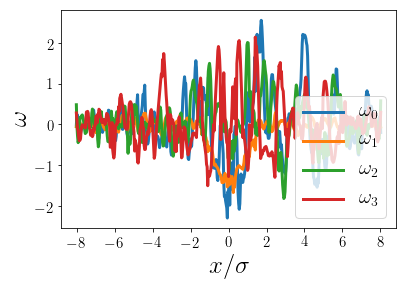

In [28]:
x=np.linspace(-conv_dim*dx/2,conv_dim*dx/2,conv_dim)
for i in range (n_conv):
    plt.plot(x,w_array[i],linewidth=3,label=r"$\omega_{"+str(i)+"}$")
plt.legend(fontsize=20,loc="lower right")
plt.xlabel(r"$x/\sigma$",fontsize=25)
plt.ylabel(r"$\omega$",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim([-4,4])
#plt.ylim([np.min(w_array)-0.05,0.8])
#plt.text(-12.5,1.2,r"$(b)$",fontsize=25)
plt.savefig("wlj_tail.eps",format="eps",bbox_inches='tight')

## one parameter

In [29]:
def w_FMT(eps):
    #d=cal_eff_diameter (eps)
    R = 1.0/2
    k=np.linspace(0,N//2,N//2+1)*2*np.pi/L
    w0=2*np.cos(k*R)/2
    k[0]=1 #keep notebook shutup
    w1=2*np.sin(k*R)/k
    w1[0]=2*R
    return w0,w1;

def cal_n(rho,w):
    return np.fft.irfft(np.fft.rfft(rho)*w)

def cal_c1_FMT(rho,eps=0):
    w0,w1 = w_FMT(eps)
    n0=cal_n(rho,w0)
    n1=cal_n(rho,w1)
    F0=-np.log(1-n1)
    F1=n0/(1-n1)
    #print(np.min(1-n1))
    return cal_n(F0,w0)+cal_n(F1,w1),-n0*np.log(1-n1)
    #return np.zeros(len(rho)),np.zeros(len(rho))
    

In [30]:
#@jit
def cal_df(rho,w,eps):
    
    n_array = np.zeros([n_conv,N])
    n1=np.zeros(N)
    tmp=""
    for i in range(n_conv):
        n_array[i]=conv(rho,w[i],1)

    #print(n_array)
    input_str="("+str(eps)+","
    for i in range(n_conv):
        input_str+="n_array["+str(i)+"]"
        if(i!=n_conv-1):
            input_str+=","
    input_str += ")"
    #print(input_str)
    c1=0
    for i in range(n_conv):
        string = "fd_n"+str(i)+input_str
        fn=eval(string)
        c1+=conv(fn,w[i],0)
    #print(c1[0])
    fed = "fd"+input_str
    #print(fed)
    fed = eval(fed)
    #print(fed)
    
    #return c1,fed
    return np.float(eps)*c1+cal_c1_FMT(rho)[0],eps*fed+cal_c1_FMT(rho)[1]

In [31]:
def eos(rho0,w,eps):
    rho=np.full(N,rho0)
    c1,f=cal_df(rho,w,eps)
    p=f-rho*c1
    return -p[0]+rho0

In [32]:
def cal_P_ML(eps):
    rho0_array=np.linspace(0,0.85,20)
    P_ML=np.zeros(len(rho0_array))
    for i in range (len(P_ML)):
        P_ML[i]=eos(rho0_array[i],w_array,eps)
    return rho0_array,P_ML

/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


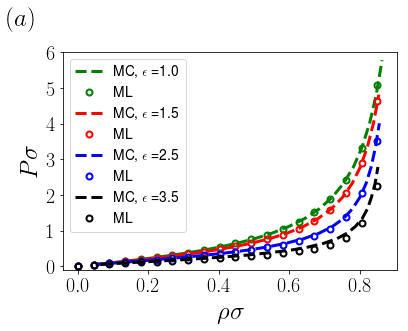

In [33]:
c=['g','r','b','k']
eps_array=[1.0,1.5,2.5,3.5]
for i in range (4):
    eps=eps_array[i]
    #c=np.random.rand(3)
    #print(c)
    P_MC = np.loadtxt("../LJ_pressure/P_rho_eps_"+str(eps)+".dat")
    plt.plot(P_MC[:,1],P_MC[:,0],"--",color=c[i],label=r"MC, $\epsilon$ ="+str(eps),lw=3)
    P_ML=cal_P_ML(eps)
    plt.plot(P_ML[0],P_ML[1],"o",markerfacecolor="None",
         markeredgecolor=c[i], markeredgewidth=2,label=r"ML",lw=2)
plt.ylim([-0.1,6])    
plt.legend(fontsize=14,loc='upper left')
plt.ylabel(r"$P\sigma$",fontsize=25)
plt.xlabel(r"$\rho\sigma$",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(-0.2,6/8*9,r"$(a)$",fontsize=25)
plt.savefig("PLJ_tail.eps",format="eps",bbox_inches='tight')

In [34]:
def mu_FMT (rho):
    R=0.5
    return (2*R*rho)/(1 - 2*R*rho) - np.log(1 - 2*R*rho)+np.log(rho)

In [35]:
rho0_array=np.linspace(0.01,0.9,100)
mu_ML=np.zeros(len(rho0_array))
for i in range (len(mu_ML)):
    mu_ML[i]=(cal_df(np.full(N,rho0_array[i]),w_array,eps)[0])[0]+np.log(rho0_array[i])

In [36]:
#@jit
def picard(rho,Vext,w,eps,alpha=10**-3,mu=0):
    c1 = cal_df(rho,w,eps)[0]
    rho_new = np.exp(-c1-Vext)
    #mu=np.log(np.sum(rho)/np.sum(rho_new))
    rho_new *= np.exp(mu)
    error=np.mean((rho_new-rho)**2)
    rho=(1-alpha)*rho+alpha*rho_new
    
    return rho,error

In [37]:
def c1_MF(rho,eps):
    r=np.linspace(-L/2,L/2,N+1)
    #print(type(r),type(eps))
    U_base=4*eps*(1/r**12-1/r**6)
    
    
    U_base[np.where(np.abs(r)<1)]=0
    LLw = int(N//2)
    #print(LLw)
    rho_pad=np.copy(rho)
    rho_tile=np.tile(rho_pad,3)
    rho_pad=rho_tile[N-LLw:2*N+LLw]
    n = np.correlate(rho_pad,U_base)
    #print(n.shape,U_base.shape)
    return n*dx

#@jit
def cal_df_MF(rho,eps):

    c1=c1_MF(rho,eps)
    
    return c1+cal_c1_FMT(rho,eps)[0]

#@jit
def picard_MF(rho,Vext,eps,alpha=10**-3,mu=0):
    eps=float(eps)
    c1 = cal_df_MF(rho,eps)
    rho_new = np.exp(-c1-Vext)
    rho_new *= np.exp(mu)
    error=np.mean((rho_new-rho)**2)
    rho=(1-alpha)*rho+alpha*rho_new
    
    return rho,error

In [38]:

f = open(data_file+'/MC_inform.dat', 'r')
MC_inform = f.read().splitlines()
for i in range(len(MC_inform)):
    #print(MC_inform[i])
    MC_inform[i]=MC_inform[i].split("\t")
f.close()
#MC_inform

In [39]:

#i=np.random.randint(0,32)
i=178
print(MC_inform[i])
print("i=",i)
Vext = np.loadtxt(data_file+'/Vext_'+str(i)+'.dat')
rho_test = np.loadtxt(data_file+'/rho_'+str(i)+'.dat')
mu = np.log(float(MC_inform[i][2]))
eps = float(MC_inform[i][1])
print(i,eps,mu)
#mu=0.22182268
#eps=2

alpha=10**-3
rho=np.full(N,np.mean(rho_test))
error_array=[]
threshold=10**-6
for i in range(100000):
    rho,error=picard(rho,Vext,w_array,eps,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break
        
rho_MF=np.full(N,0.1)
error_array=[]
threshold=10**-6
for i in range(1000000):
    rho_MF,error=picard_MF(rho_MF,Vext,eps,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break

['178', '0.793294', '1.18779']
i= 178
178 0.793294 0.17209443763843826
0.06960251071457138
0.0012983744207553517
0.00024949173858444405
5.30369930593894e-05
1.1561277380403478e-05
2.571133998651769e-06


/home/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


1.3147410607098275
0.0033655131172195866
9.20947908322842e-05
1.3564195614322196e-05
2.820949267537811e-06


/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


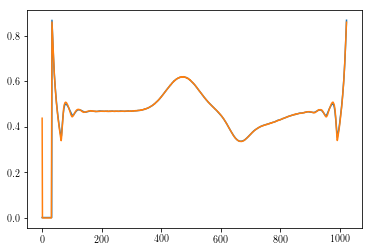

In [40]:
plt.plot(rho)
plt.plot(rho_test)


In [41]:
data_file="../LJ_data_wall/data_all"
f = open(data_file+'/MC_inform.dat', 'r')
MC_inform = f.read().splitlines()
for i in range(len(MC_inform)):
    #print(MC_inform[i])
    MC_inform[i]=MC_inform[i].split("\t")
f.close()
MC_inform

[['0', '1.33096', '1.45479'],
 ['1', '0.846207', '0.508023'],
 ['2', '1.841', '0.531349'],
 ['3', '0.583017', '1.55356'],
 ['4', '1.5957', '0.60815'],
 ['5', '1.10616', '0.650481'],
 ['6', '1.3341', '0.649808'],
 ['7', '0.852226', '0.706947'],
 ['8', '1.85647', '1.75166'],
 ['9', '0.614887', '1.79015'],
 ['10', '0.865999', '0.828434'],
 ['11', '1.88256', '1.87995'],
 ['12', '1.37323', '1.90224'],
 ['13', '0.887157', '1.95192'],
 ['14', '1.88901', '1.9909'],
 ['15', '1.39245', '1.02485'],
 ['16', '0.894093', '1.06048'],
 ['17', '1.14672', '2.09642'],
 ['18', '1.39708', '1.12422'],
 ['19', '1.65414', '1.16452'],
 ['20', '1.14784', '2.19358'],
 ['21', '1.41492', '2.2454'],
 ['22', '0.918302', '1.2859'],
 ['23', '1.92314', '1.3266'],
 ['24', '1.42612', '2.35801'],
 ['25', '1.68407', '1.40537'],
 ['26', '1.93905', '2.44133'],
 ['27', '0.691377', '1.47859'],
 ['28', '0.947011', '1.51727'],
 ['29', '1.19782', '0.555699'],
 ['30', '1.45244', '1.5898'],
 ['31', '1.69911', '1.62207'],
 ['32', '1

In [42]:

i=180
#rho_wall = np.loadtxt('LJ_data_fuzzy/LJ_python_wall/wall_mu_2_eps_2_MC.dat')
#Vext_wall = np.loadtxt('LJ_data_fuzzy/LJ_python_wall/wall_Vext.dat')
Vext = np.loadtxt(data_file+'/Vext_'+str(i)+'.dat')
rho_test = np.loadtxt(data_file+'/rho_'+str(i)+'.dat')

mu = np.log(float(MC_inform[i][2]))
eps = np.float(MC_inform[i][1])
print(mu,eps)
#mu=0.22182268
#eps=2
print(i,eps,np.exp(mu))
alpha=10**-3
rho=np.full(N,np.mean(rho_test ))
error_array=[]
threshold=10**-6
for i in range(100000):
    rho,error=picard(rho,Vext,w_array,eps,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break
        
rho_MF=np.full(N,0.1)
error_array=[]
threshold=10**-6
for i in range(1000000):
    rho_MF,error=picard_MF(rho_MF,Vext,eps,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break

0.24067693916634625 1.30501
180 1.30501 1.27211
0.49094233931694853
0.0027093394222968774
0.0005123603623539883
0.0001293061631255556
3.623467597095092e-05
1.0724408590544016e-05
3.3188598909339314e-06
1.0700731527563421e-06


/home/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


3.196783459843446
0.0037099216543140514
0.0001841386696091996
3.878276060904032e-05
1.0943403460017528e-05
3.4109646498310575e-06
1.1289513730005978e-06


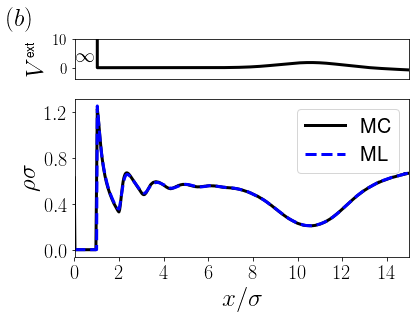

In [43]:
x=np.linspace(0,L-dx,N)
grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.5)
plt.subplot(grid[0, 0])

plt.text(0.1,2,r"$\infty$",fontsize=20)
plt.plot(x,Vext,"k-",lw=3)
plt.xlim([0.02,15])
plt.ylim([-4,10])
plt.text(-3,15,r"$(b)$",fontsize=25)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize=15)


plt.ylabel(r"$V^{\mbox{\large  ext}}$",fontsize=25)

plt.subplot(grid[1:, 0])
plt.plot(x,rho_test,"k-",lw=3,label="MC")
plt.plot(x,rho,"b--",lw=3,ms=2,label="ML")
plt.xlim([0.02,15])
plt.legend(fontsize=20,loc="upper right")
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x/\sigma$",fontsize=25)
#plt.title(r"$\rho_0\sigma=0.43$",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks([0,0.4,0.8,1.2],fontsize=20)
plt.savefig("rho_LJ_tail_inside.eps",format="eps",bbox_inches='tight')

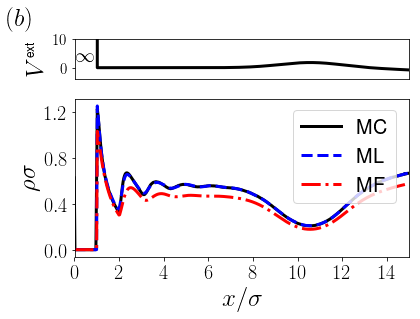

In [44]:
x=np.linspace(0,L-dx,N)
grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.5)
plt.subplot(grid[0, 0])

plt.text(0.1,2,r"$\infty$",fontsize=20)
plt.plot(x,Vext,"k-",lw=3)
plt.xlim([0.02,15])
plt.ylim([-4,10])
plt.text(-3,15,r"$(b)$",fontsize=25)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize=15)


plt.ylabel(r"$V^{\mbox{\large  ext}}$",fontsize=25)

plt.subplot(grid[1:, 0])
plt.plot(x,rho_test,"k-",lw=3,label="MC")
plt.plot(x,rho,"b--",lw=3,ms=2,label="ML")
plt.plot(x,rho_MF,"r-.",lw=3,ms=2,label="MF")

plt.xlim([0.02,15])
plt.legend(fontsize=20,loc="upper right", bbox_to_anchor=(0.99, 0.99))
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x/\sigma$",fontsize=25)
#plt.title(r"$\rho_0\sigma=0.43$",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks([0,0.4,0.8,1.2],fontsize=20)
plt.savefig("rho_LJ_tail_inside_w_MF.eps",format="eps",bbox_inches='tight')

Text(0.5, 0, '$x(\\sigma)$')

/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


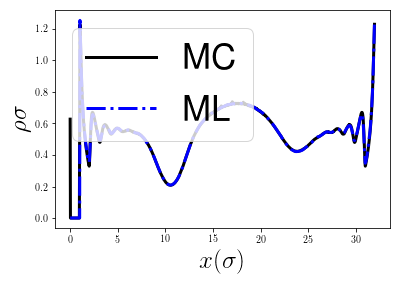

In [45]:
x=np.linspace(0,L-dx,N)
plt.plot(x,rho_test,"k-",lw=3,label="MC")
plt.plot(x,rho,"b-.",lw=3,ms=2,label="ML")
plt.legend(fontsize=35,loc="upper left")
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x(\sigma)$",fontsize=25)
#plt.title(r"$\rho_0\sigma=0.43$",fontsize=25)
#plt.savefig("rho_LJ_tail_inside.eps",format="eps",bbox_inches='tight')

In [46]:
data_file="../LJ_data_wall_test/data_0"
f = open(data_file+'/MC_inform.dat', 'r')
MC_inform = f.read().splitlines()
for i in range(len(MC_inform)):
    #print(MC_inform[i])
    MC_inform[i]=MC_inform[i].split("\t")
f.close()
MC_inform

[['0', '1.5', '1.5'],
 ['1', '1.6', '1.6'],
 ['2', '1.7', '1.7'],
 ['3', '1.8', '1.8'],
 ['4', '1.9', '1.9'],
 ['5', '2', '2'],
 ['6', '2.1', '2.1'],
 ['7', '2.2', '2.2'],
 ['8', '2.3', '2.3'],
 ['9', '2.4', '2.4'],
 ['10', '2.5', '2.5'],
 ['11', '2.6', '2.6'],
 ['12', '2.7', '2.7'],
 ['13', '2.8', '2.8'],
 ['14', '2.9', '2.9'],
 ['15', '3', '3']]

In [47]:
i= 2
#rho_wall = np.loadtxt('LJ_data_fuzzy/LJ_python_wall/wall_mu_2_eps_2_MC.dat')
#Vext_wall = np.loadtxt('LJ_data_fuzzy/LJ_python_wall/wall_Vext.dat')
Vext = np.loadtxt(data_file+'/Vext_'+str(i)+'.dat')
rho_test = np.loadtxt(data_file+'/rho_'+str(i)+'.dat')

mu = np.log(float(MC_inform[i][2]))
eps = np.float(MC_inform[i][1])
print(type(eps))
#mu=0.22182268
#eps=2
print(i,eps,np.exp(mu))
alpha=10**-3
rho=np.full(N,np.mean(rho_test))
error_array=[]
threshold=10**-6
for i in range(1000000):
    rho,error=picard(rho,Vext,w_array,eps,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break
        
rho_MF=np.full(N,0.1)
error_array=[]
threshold=10**-6
for i in range(1000000):
    rho_MF,error=picard_MF(rho_MF,Vext,eps,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break

<class 'float'>
2 1.7 1.7
1.6594037039656089
0.006179251720728456
0.0014461588724756585
0.00046680752837293
0.00017514457759137443
7.303466650947319e-05
3.3511369978841514e-05
1.6823788190995122e-05
9.177162194074388e-06
5.392450894191022e-06
3.3794983570938227e-06
2.235724223677466e-06
1.5460148457655298e-06
1.1078523738010877e-06


/home/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


8.723754493101968
0.003198357637311192
0.0004868419156786978
0.00018407451627108616
8.359235379666068e-05
4.185294109275874e-05
2.252861823475913e-05
1.2890048831224956e-05
7.80429245588383e-06
4.998016900564868e-06
3.389669691233933e-06
2.4350436642461062e-06
1.848029932406813e-06
1.4729654741646253e-06
1.2228516494702829e-06
1.048016302916023e-06


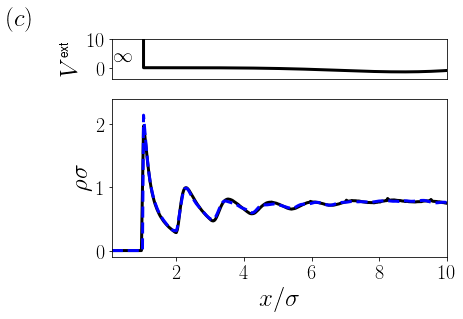

In [48]:
x=np.linspace(0,L-dx,N)
grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.5)
plt.subplot(grid[0, 0])

plt.text(0.15,2,r"$\infty$",fontsize=20)
plt.plot(x,Vext,"k-",lw=3)
plt.ylim([-4,10])
plt.xlim([0.1,10])
plt.text(-3,15,r"$(c)$",fontsize=25)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ylabel(r"$V^{\mbox{\large  ext}}$",fontsize=25)

plt.subplot(grid[1:, 0])
plt.plot(x,rho_test,"k-",lw=3,label="MC")
plt.plot(x,rho,"b--",lw=3,ms=2,label="ML")
#plt.legend(fontsize=12,loc="lower right")
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x/\sigma$",fontsize=25)
plt.xlim([0.1,10])
plt.ylim([-0.1,2.4])
plt.xticks(fontsize=20)
plt.yticks([0,1,2],fontsize=20)
#plt.title(r"$\rho_0\sigma=0.43$",fontsize=25)
plt.savefig("rho_LJ_tail_outside.eps",format="eps",bbox_inches='tight')

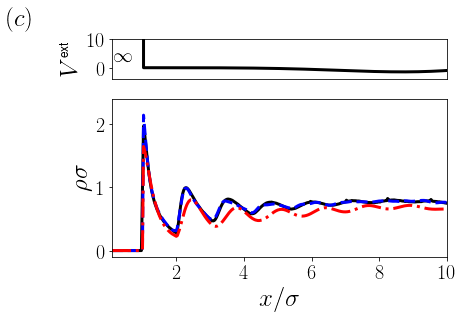

In [49]:
x=np.linspace(0,L-dx,N)
grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.5)
plt.subplot(grid[0, 0])

plt.text(0.15,2,r"$\infty$",fontsize=20)
plt.plot(x,Vext,"k-",lw=3)
plt.ylim([-4,10])
plt.xlim([0.1,10])
plt.text(-3,15,r"$(c)$",fontsize=25)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ylabel(r"$V^{\mbox{\large  ext}}$",fontsize=25)

plt.subplot(grid[1:, 0])
plt.plot(x,rho_test,"k-",lw=3,label="MC")
plt.plot(x,rho,"b--",lw=3,ms=2,label="ML")
plt.plot(x,rho_MF,"r-.",lw=3,ms=2,label="MF")
#plt.legend(fontsize=12,loc="lower right")
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x/\sigma$",fontsize=25)
plt.xlim([0.1,10])
plt.ylim([-0.1,2.4])
plt.xticks(fontsize=20)
plt.yticks([0,1,2],fontsize=20)
#plt.title(r"$\rho_0\sigma=0.43$",fontsize=25)
plt.savefig("rho_LJ_tail_outside_w_MF.eps",format="eps",bbox_inches='tight')